In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

### ClassWork

In [ ]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# Define Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 106097297.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33361524.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 57556166.38it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11245884.75it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2801
Epoch [1/5], Step [200/600], Loss: 0.1576
Epoch [1/5], Step [300/600], Loss: 0.2045
Epoch [1/5], Step [400/600], Loss: 0.1285
Epoch [1/5], Step [500/600], Loss: 0.3329
Epoch [1/5], Step [600/600], Loss: 0.1203
Epoch [2/5], Step [100/600], Loss: 0.1693
Epoch [2/5], Step [200/600], Loss: 0.0541
Epoch [2/5], Step [300/600], Loss: 0.0961
Epoch [2/5], Step [400/600], Loss: 0.2316
Epoch [2/5], Step [500/600], Loss: 0.0483
Epoch [2/5], Step [600/600], Loss: 0.0736
Epoch [3/5], Step [100/600], Loss: 0.0942
Epoch [3/5], Step [200/600], Loss: 0.1014
Epoch [3/5], Step [300/600], Loss: 0.0504
Epoch [3/5], Step [400/600], Loss: 0.0602
Epoch [3/5], Step [500/600], Loss: 0.0167
Epoch [3/5], Step [600/600], Loss: 0.0292
Epoch [4/5], Step [100/600], Loss: 0.1350
Epoch [4/5], Step [200/600], Loss: 0.0213
Epoch [4/5], Step [300/600], Loss: 0.0291
Epoch [4/5], Step [400/600], Loss: 0.0137
Epoch [4/5], Step [500/600], Loss: 0.0350
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.01 %


In [ ]:
# Let's take a look on some examples
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([100, 1, 28, 28])

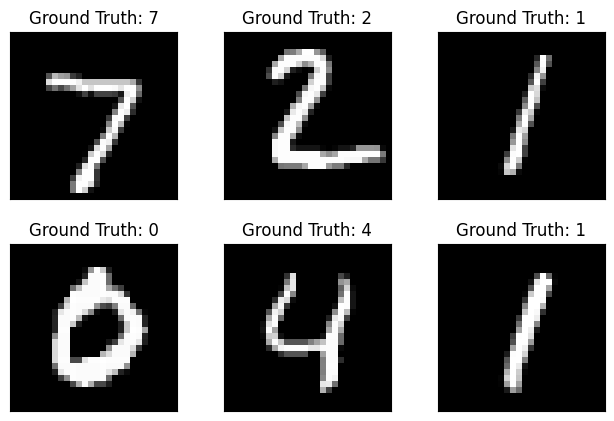

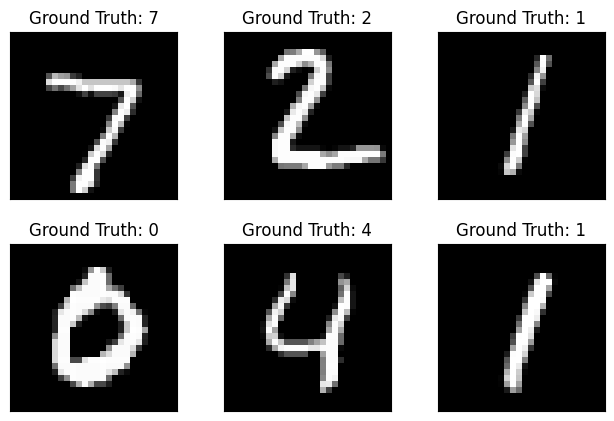

In [ ]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [ ]:
with torch.no_grad():
    images = example_data.reshape(-1, 28*28).to(device)
    output = model(images)

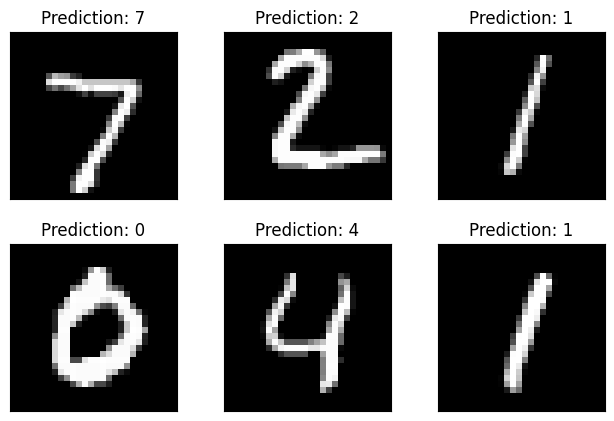

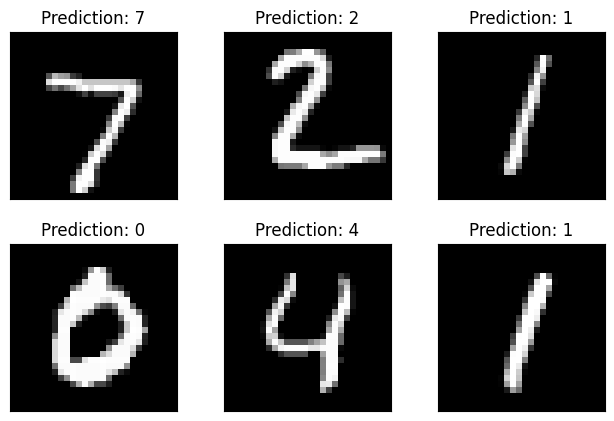

In [ ]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
fig

In [ ]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

### HomeWork

1. Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

2. На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

3. К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом


In [2]:
!wget https://raw.githubusercontent.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/main/Sem3/Lab5/hw/hong.png
!wget https://raw.githubusercontent.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/main/Sem3/Lab5/hw/hong_res.png


--2023-12-19 07:45:45--  https://raw.githubusercontent.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/main/Sem3/Lab5/hw/hong.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1135054 (1.1M) [image/png]
Saving to: ‘hong.png’

hong.png            100%[===================>]   1.08M  --.-KB/s    in 0.05s   

2023-12-19 07:45:46 (20.2 MB/s) - ‘hong.png’ saved [1135054/1135054]

--2023-12-19 07:45:46--  https://raw.githubusercontent.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/main/Sem3/Lab5/hw/hong_res.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respon

In [4]:
import os,numpy as np
import cv2 as cv
hong_img_path = os.path.join(
    os.getcwd(),
    'hong.png'
)
img = cv.cvtColor(cv.imread("hong.png"), cv.COLOR_BGR2GRAY)

#### 1

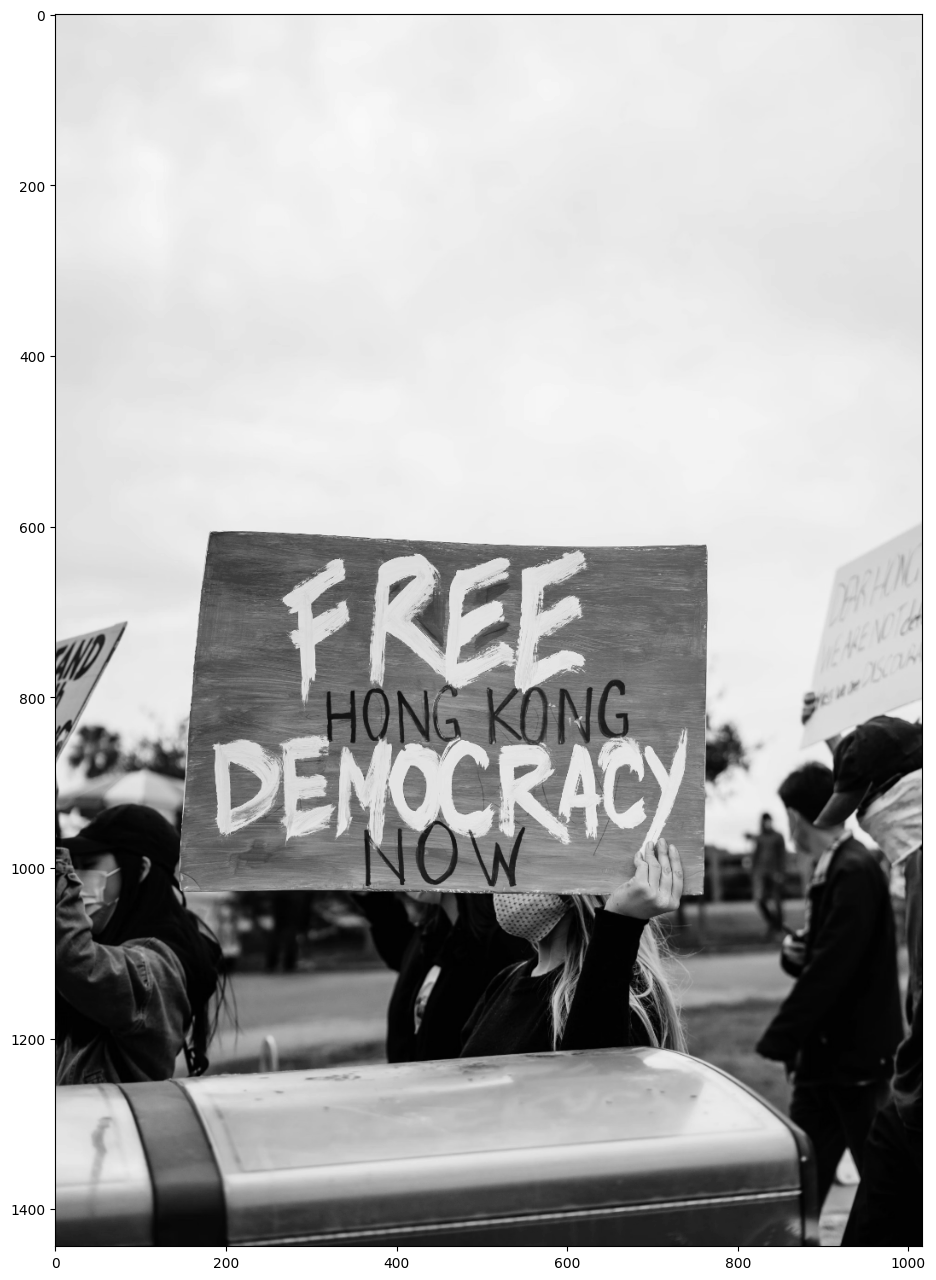

In [8]:
plt.figure(figsize=(16,16))
plt.imshow(img, cmap="gray")

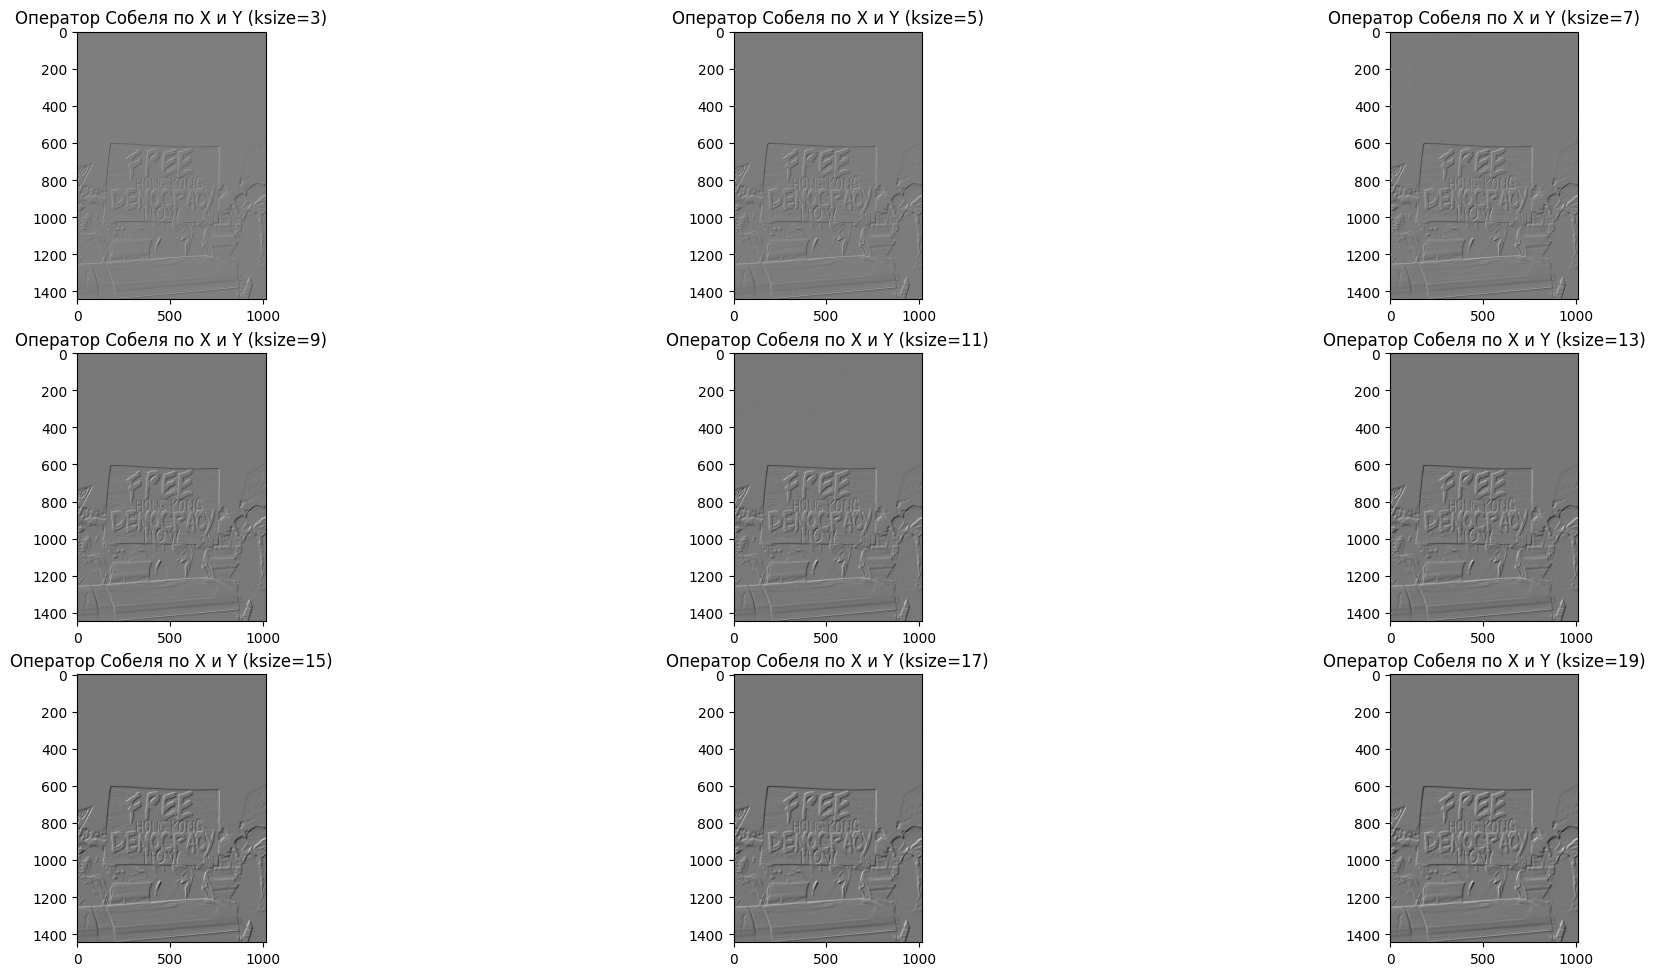

In [12]:
ksize_list=list(range(3,21,2))

cols = 3  #
rows = len(ksize_list) // cols + 1  # количество строк в таблице

plt.figure(figsize=(24,16))
for i, ksize in enumerate(ksize_list):
    sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=ksize)
    sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=ksize)
    img2 = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
    plt.subplot(rows, cols, i+1)
    plt.imshow(img2, cmap="gray")
    plt.title(f'Оператор Собеля по X и Y (ksize={ksize})')
# plt.tight_layout()
plt.show()

#### 2

#### 3

Поварьируем размером ядра и количеством итераций

In [7]:
import itertools

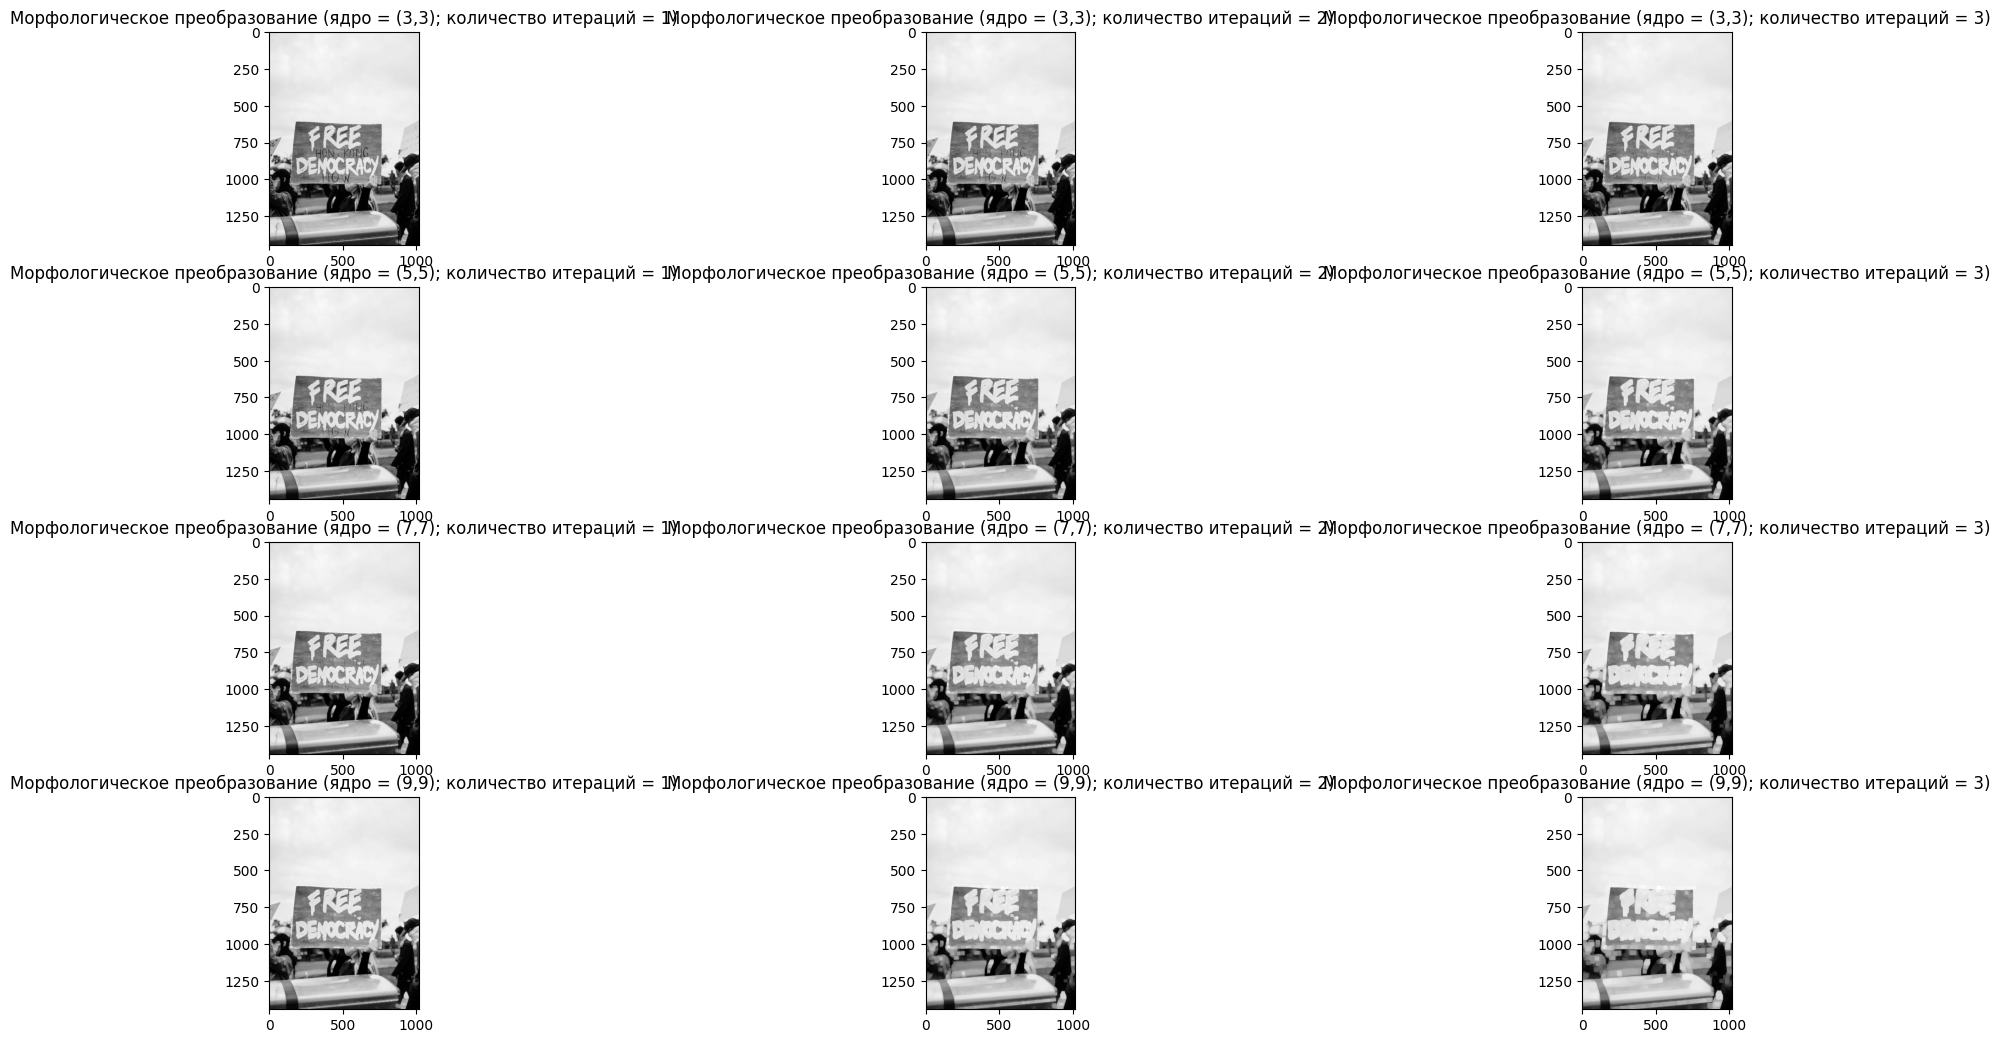

In [14]:
kernel_size_list = list(range(3,10,2));
iterations_list = list(range(1,4))
# Создание комбинаций параметров
param_combinations = list(itertools.product(
    kernel_size_list, iterations_list
))
outputs = {}
cols = 3  #
rows = len(param_combinations) // cols + 1  # количество строк в таблице

plt.figure(figsize=(24,16))
for i, (kernel_size,iterations) in enumerate(param_combinations):
    kernel = np.ones((kernel_size,kernel_size),np.uint8)
    img4 = img.copy()
    img4 = cv.dilate(img4,kernel,iterations = iterations)
    plt.subplot(rows, cols, i+1)
    plt.imshow(img4, cmap="gray")
    plt.title(f'Морфологическое преобразование (ядро = ({kernel_size},{kernel_size}); количество итераций = {iterations})')
# plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Морфологическое преобразование (ядро = (5,5); количество итераций = 2)')

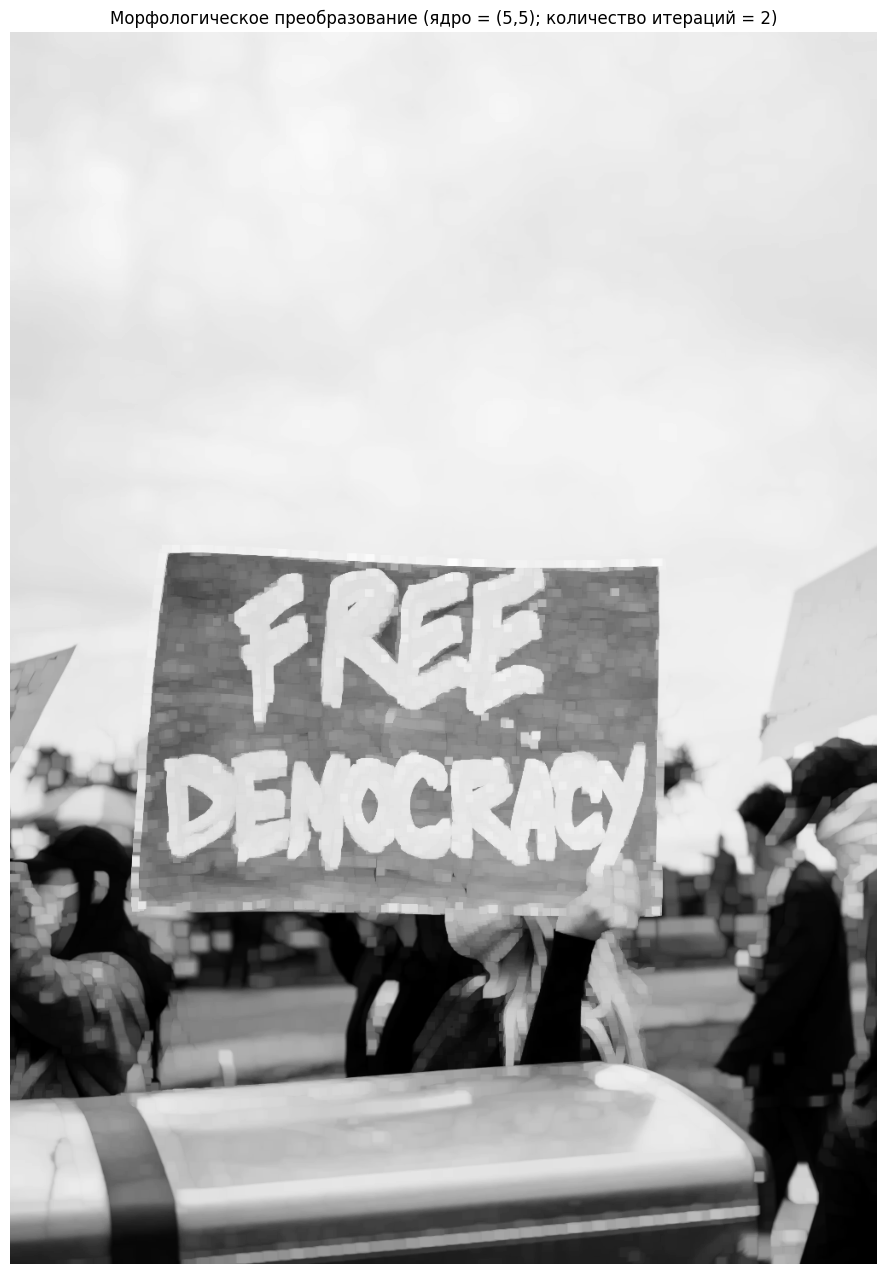

In [18]:
kernel_size,iterations = 5,2

kernel = np.ones((kernel_size,kernel_size),np.uint8)
img4 = img.copy()
img4 = cv.dilate(img4,kernel,iterations = iterations)


plt.figure(figsize=(24,16))
plt.imshow(img4, cmap="gray")
plt.axis(False)
plt.title(f'Морфологическое преобразование (ядро = ({kernel_size},{kernel_size}); количество итераций = {iterations})')